In [133]:
#importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as srn
import numpy as np

In [135]:
dados = pd.read_csv("../dados/netflix_titles.csv", encoding='latin1')
dados.shape

(8809, 26)

Há colunas com nomes vazios:

In [138]:
dados.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Verificando quais são essas colunas:

In [141]:
dados.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

Verificando Nulos do dataset e removendo eles

In [143]:
dados.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
Unnamed: 12     8809
Unnamed: 13     8809
Unnamed: 14     8809
Unnamed: 15     8809
Unnamed: 16     8809
Unnamed: 17     8809
Unnamed: 18     8809
Unnamed: 19     8809
Unnamed: 20     8809
Unnamed: 21     8809
Unnamed: 22     8809
Unnamed: 23     8809
Unnamed: 24     8809
Unnamed: 25     8809
dtype: int64

In [145]:
colunas_selec = [f'Unnamed: {i}' for i in range(12, 25)]
dados.drop(columns=colunas_selec, inplace = True)

Checando se existem dados categóricos nulos:

In [149]:
dados.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
Unnamed: 25     8809
dtype: int64

Removendo últimos dados numéricos nulos da Coluna Unnamed: 25
e 
Substituindo dados nulos categóricos NaN por Unknown

In [152]:
dados.drop(columns = ['Unnamed: 25'], inplace=True)
dados.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [153]:
dados['director'].fillna('Unknown', inplace=True)
dados['cast'].fillna('Unknown', inplace=True)
dados['country'].fillna('Unknown', inplace=True)
dados.isna().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

In [156]:
dados.dropna(subset=['date_added', 'rating', 'duration'], inplace=True)
dados.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [158]:
dados.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Visualização dos Dados:

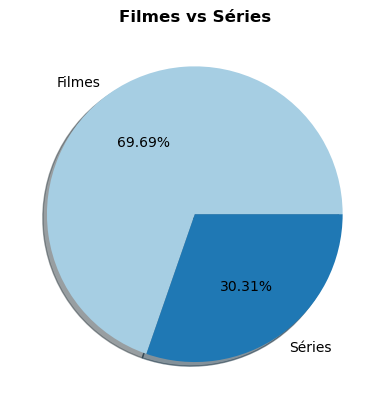

In [161]:
dimensao = dados['type'].value_counts()
labels = 'Filmes', 'Séries'
color = srn.color_palette('Paired')

plt.pie(dimensao, colors=color, labels=labels, autopct='%1.2f%%', shadow=bool)
plt.title('Filmes vs Séries', fontweight='bold')
plt.show()

Dessa forma conseguimos perceber que os filmes claramenta superam a quantidade de Séries dentro da plataforma!

- Quais países tem as maiores quantidades de filmes produzidos dentro da Netflix?- Quais países tem mais séries produzidas?
- Quais países tem as maiores quantidades de produtos dentro da plataforma?x?

In [165]:
#filtrando os dados de filmes
filmes = dados[dados['type'] == 'Movie']
#selecionando apenas os filmes diferente de Unknown
filmes = filmes[filmes['country'] != 'Unknown']
#selecionando a contagem dos dados categóricos, pegando os 10 maiores e colocando em ordem decrescente
top_filmes = filmes['country'].value_counts().nlargest(10).sort_values(ascending = False)
top_filmes

country
United States     2056
India              893
United Kingdom     206
Canada             122
Spain               97
Egypt               92
Nigeria             86
Indonesia           77
Turkey              76
Japan               76
Name: count, dtype: int64

In [167]:
#selecionando series
series = dados[dados['type'] == 'TV Show']
#selecionando séries com informações de países
series = series[series['country'] != 'Unknown']
#selecionando os 10 países com a maior quantidade de séries produzidas
top_series = series['country'].value_counts().nlargest(10).sort_values(ascending = False)
top_series

country
United States     754
United Kingdom    212
Japan             167
South Korea       159
India              79
Taiwan             68
Canada             59
France             49
Spain              48
Australia          46
Name: count, dtype: int64

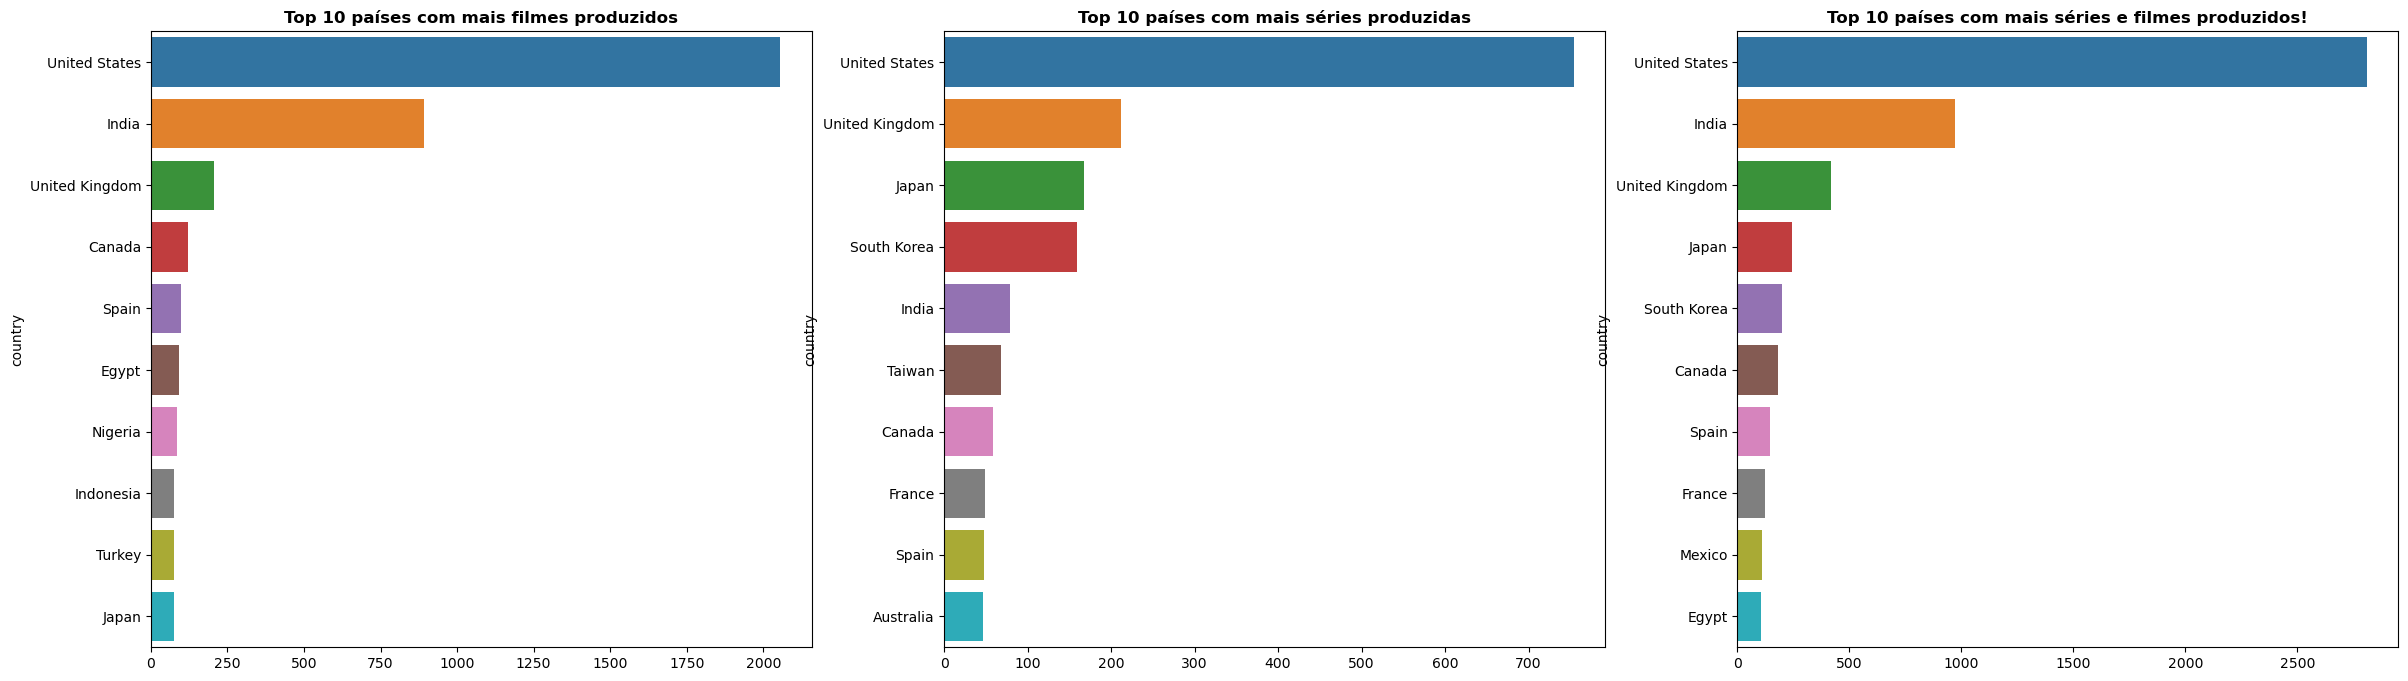

In [169]:
#limpando os dados sem informações de países
dados = dados[dados['country'] != 'Unknown']

#gerando o gráficos
fig1, ax = plt.subplots(1, 3, figsize=(29, 8))
ax[0].set_title('Top 10 países com mais filmes produzidos', fontweight='bold')
srn.barplot(data=filmes, x=top_filmes.values, y=top_filmes.index, ax=ax[0])

ax[1].set_title('Top 10 países com mais séries produzidas', fontweight='bold')
srn.barplot(data=series, x=top_series.values, y=top_series.index, ax=ax[1])

ax[2].set_title('Top 10 países com mais séries e filmes produzidos!', fontweight='bold')
srn.barplot(data=dados, x=dados.country.value_counts().nlargest(10).sort_values(ascending=False).values,
           y=dados.country.value_counts().nlargest(10).sort_values(ascending=False).index)

plt.show()

Os Estados Unidos são o maior produtor de filmes e séries de TV na Netflix, seguidos pela Índia e pelo Reino Unido na produção total. No entanto, o Japão e a Coreia estão acima da Índia na produção de programas de TV ( talvez seja devido à presença de animes e desenhos na Netflix?) e abaixo dos Estados Unidos e do Reino Unido.

- Quem são os diretores de filmes mais populares na Netflix?
- Quem são os diretores de séries de TV mais populares na Netflix?

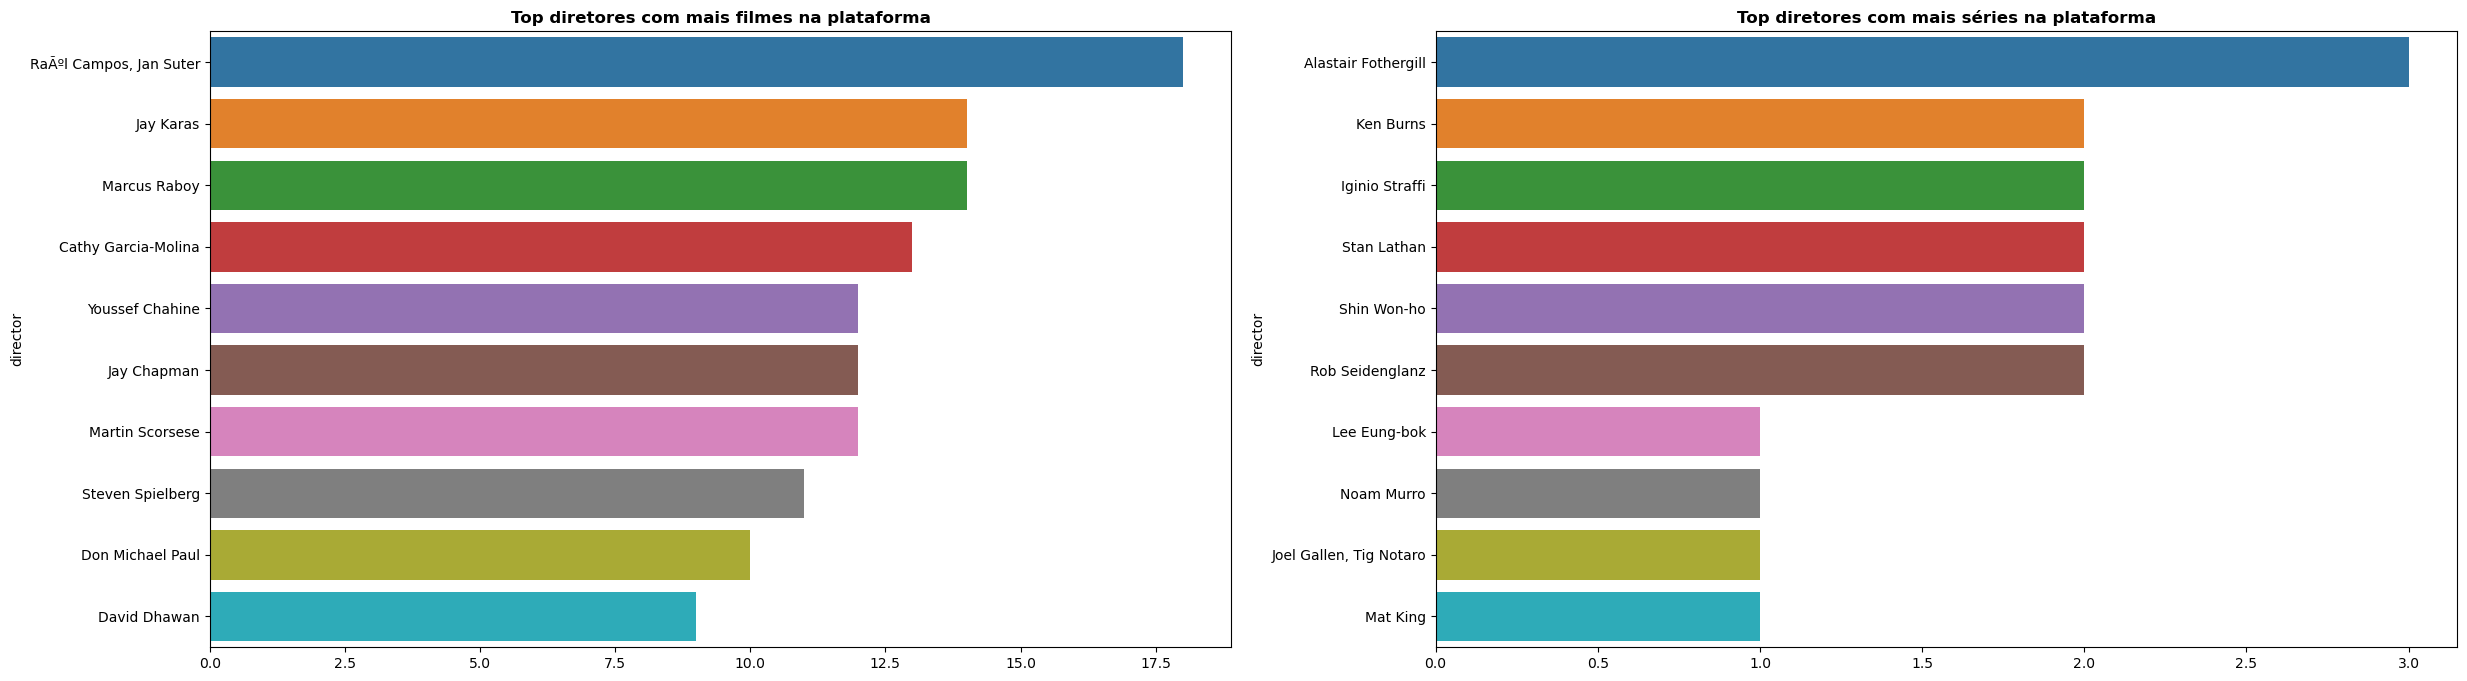

In [172]:
#selecionando os 11 diretores com maior quantidade de filmes na plataforma de forma decrescente
top_diretores_filmes = filmes.director.value_counts().nlargest(11).sort_values(ascending=False)
#dropando valores unknown
top_diretores_filmes = top_diretores_filmes.drop('Unknown')

#selecionando os diretores 11 com maior quantidade de séries produzidas
top_diretores_series = series.director.value_counts().nlargest(11).sort_values(ascending=False)
#dropando valores unknown
top_diretores_series = top_diretores_series.drop('Unknown')

#gerando gráficos
fig, ax = plt.subplots(1, 2, figsize=(29, 8))
ax[0].set_title('Top diretores com mais filmes na plataforma', fontweight='bold')
srn.barplot(data=filmes, x=top_diretores_filmes.values, y=top_diretores_filmes.index, ax=ax[0])

ax[1].set_title('Top diretores com mais séries na plataforma', fontweight='bold')
srn.barplot(data=series, x=top_diretores_series.values, y=top_diretores_series.index, ax=ax[1])

plt.show()

Jan Suter é o diretor com mais filmes na plataforma, seguido por Jay Karas e Marcus Raboy. Menção honrosa para Martin Scorsese e Steven Spielberg no top 10.

- Quais são os anos em que mais filmes e séries foram adicionados à Netflix?

C:\Users\pchel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


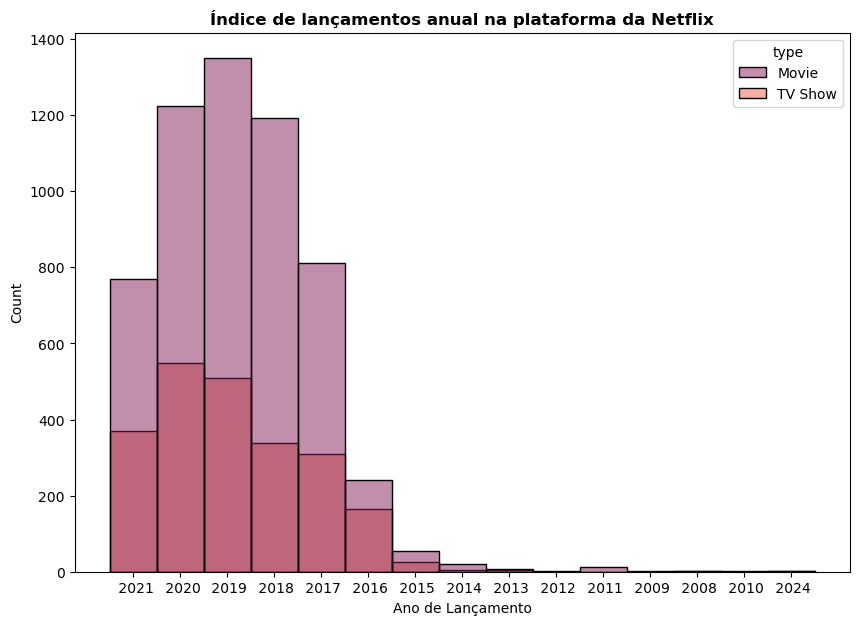

In [175]:
#selecionando os dados do último ano
dados['year_add'] = dados['date_added'].apply(lambda x : x.split(',')[-1])

plt.figure(figsize=(10,7))
plt.title('Índice de lançamentos anual na plataforma da Netflix', fontweight='bold')
plt.xlabel('Ano de Lançamento')
srn.histplot(data=dados, x=dados['year_add'].sort_values(ascending=False), bins=30, hue='type', palette='rocket')
plt.show()

2018, 2019 e 2020 são os anos em que teve as maiores quantidades de filmes e séries adicionados à plataforma.

- Qual é a duração média de um filme na Netflix?

C:\Users\pchel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


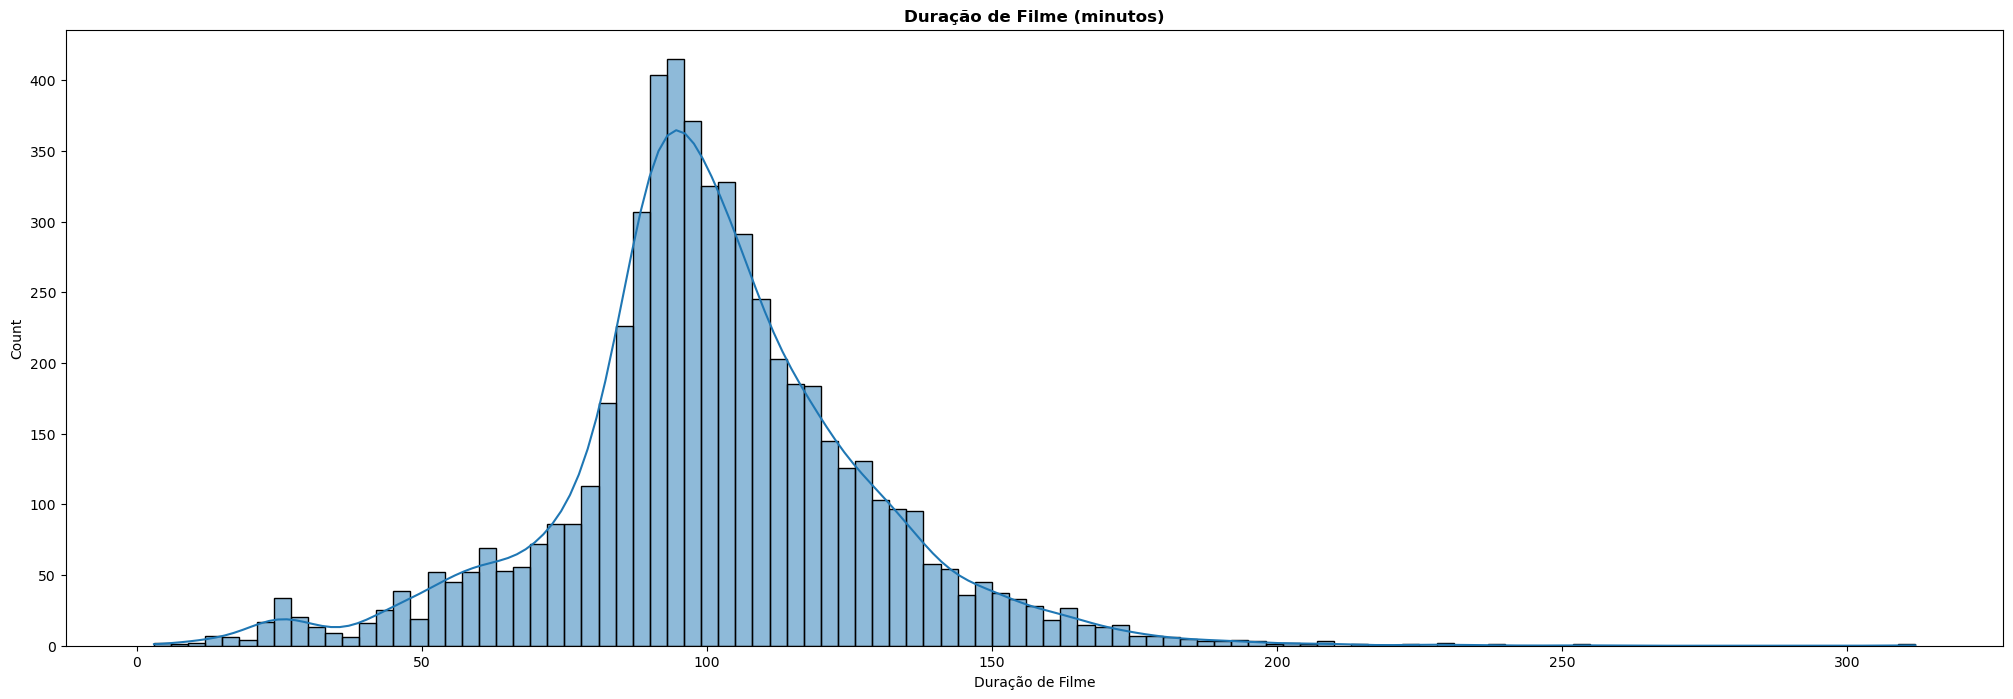

In [178]:
tempo_filme = dados[dados['type'] == 'Movie']['duration'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(25, 8))
srn.histplot(data=tempo_filme, kde=True, legend=False)
plt.title('Duração de Filme (minutos)', fontweight='bold')
plt.xlabel('Duração de Filme')

plt.show()

A duração média de um filme na Netflix é de 100,52 minutos.
- Qual é a duração média de uma série de TV na Netflix?

In [197]:
series_tempo = dados[dados['type'] == 'TV Show']['duration'].str.extract('(\d+)').astype(float)
media_series_tempo = np.mean(series_tempo.dropna())

print(f'A média de duração das séries da Netflix é de {media_series_tempo:.2f} temporadas.')

A média de duração das séries da Netflix é de 1.84 temporadas.


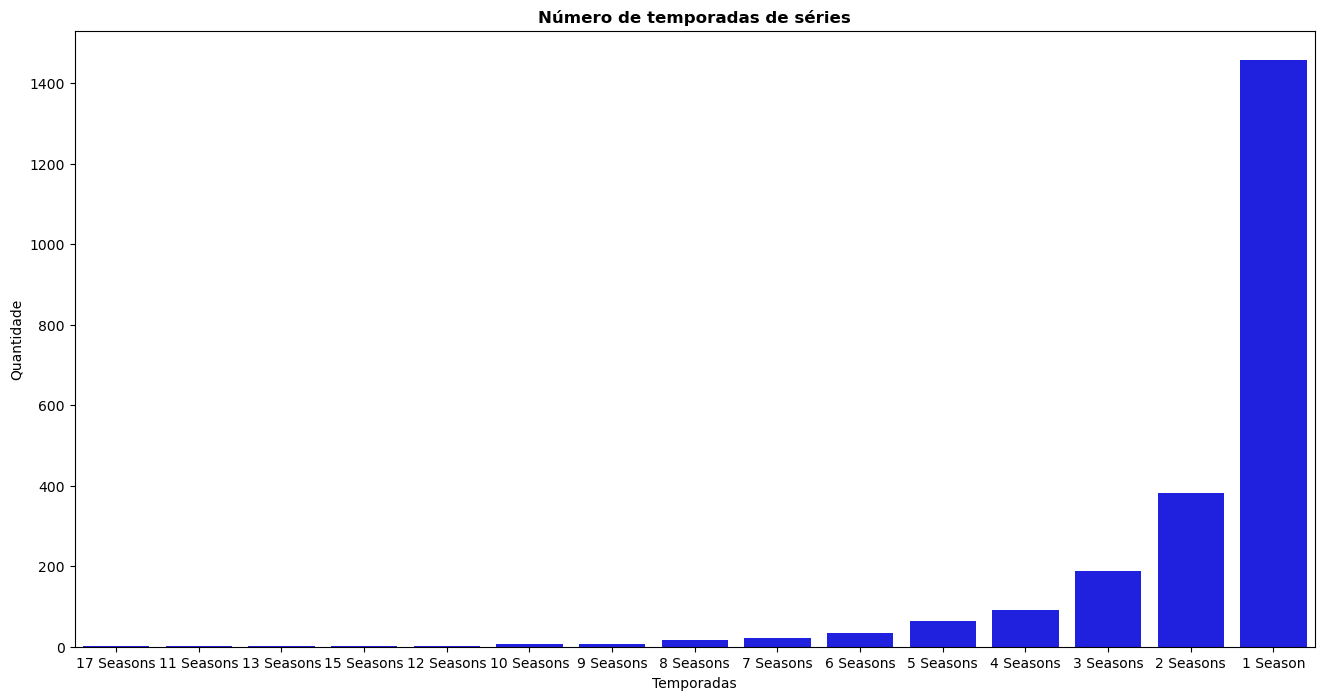

In [191]:
dados_series = dados.loc[dados['type'] == 'TV Show']
temporada_serie = dados_series['duration'].value_counts().sort_values(ascending=True)

plt.figure(figsize=(16, 8))
srn.barplot(x=temporada_serie.index, y=temporada_serie.values, color='blue')
plt.title('Número de temporadas de séries', fontweight='bold')
plt.ylabel('Quantidade')
plt.xlabel('Temporadas')

plt.show()

Como podemos ver, as séries de TV na Netflix com apenas uma temporada são a maioria, ultrapassando a marca de 1400 séries.

## Conclusão  
A análise deste conjunto de dados me ajudou a aprimorar minhas habilidades no mundo da ciência de dados e da visualização de da!do.


Salvando para visualização no PowerBI

In [269]:
dados.to_csv('../dados/dataset_tratado.csv', index = False)